In [52]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
import matplotlib.pyplot as plt
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

#读入数据
data = pd.read_excel('C:/Users/Tongrui/Desktop/Bund.xlsx')
data = data.dropna()
x=(data.iloc[:,0].values).astype(np.float64)
x=x.reshape(len(x),1)
y=(data.iloc[:,1].values).astype(np.float64)
y=y.reshape(len(y),1)
px=np.linspace(1,900, 2*len(x),dtype=np.float64)
px=px.reshape(len(px),1) 

In [16]:
# #模型8(LSTM)######################## 
# xT=tf.reshape(x,[1,len(x),1])
# yT=tf.reshape(y,[1,len(y),1])
# pxT=tf.reshape(px,[1,len(px),1])
  
# model8=tf.keras.Sequential([
#                             tf.keras.layers.LSTM(64,activation='tanh',return_sequences=True),
#                             tf.keras.layers.Dense(1,activation='tanh')
#                            ])
# model8.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),loss='mse')
# model8.fit(xT,yT,epochs=100,verbose=0)
# py8=model8.predict(pxT)
# py8=tf.squeeze(py8,0)

# plt.figure(figsize=(12, 6))
# plt.title('ANN Prediction',font='times new roman',fontsize=12)
# plt.xlabel('Time (d)',font='times new roman',fontsize=12)
# plt.xticks(font='times new roman',fontsize=12)
# plt.ylabel('Settlement (mm)',font='times new roman',fontsize=12)
# plt.yticks(font='times new roman',fontsize=12)
# plt.gca().spines["right"].set_color("none")
# plt.gca().spines["top"].set_color("none")
# plt.gca().spines["bottom"].set_position(("data", 0))
# plt.gca().spines["left"].set_position(("data", 0))
# plt.scatter(x,y,label='Observation')
# plt.plot(px, py8, label='Prediction 8',linestyle='-', color='purple')#模型8（Gaussion）
# plt.annotate('Max std', xy=(px[max2], py2[max2]), xytext=(px[max2]+1.5, py2[max2]+1.5),
#              arrowprops=dict(facecolor='red', arrowstyle='->'))
# plt.annotate('Min std', xy=(px[min2], py2[min2]), xytext=(px[min2]-1.5, py2[min2]-1.5),
#              arrowprops=dict(facecolor='blue', arrowstyle='->'))
# plt.legend(loc='center right',prop='times new roman',fontsize=12)
# plt.savefig('C:/Users/Tongrui/Desktop/1.jpeg')
# plt.show()

In [1]:
# #模型7(Variational GP)######################## 
# class RBFKernelFn(tf.keras.layers.Layer):
#   def __init__(self, **kwargs):
#     super(RBFKernelFn, self).__init__(**kwargs)
#     dtype = kwargs.get('dtype', None)

#     self._amplitude = self.add_variable(
#             initializer=tf.constant_initializer(1),
#             dtype=dtype,
#             name='amplitude')
    
#     self._length_scale = self.add_variable(
#             initializer=tf.constant_initializer(1.5),
#             dtype=dtype,
#             name='length_scale')

#   def call(self, x):
#     # Never called -- this is just a layer so it can hold variablesin a way Keras understands.
#       return x

#   @property
#   def kernel(self):
#     return tfp.math.psd_kernels.ExponentiatedQuadratic(
#       amplitude=tf.nn.softplus(1. * self._amplitude),
#       length_scale=tf.nn.softplus(2. * self._length_scale)
#     )
      
# # Build model.
# num_inducing_points=30
# model7 =tf.keras.Sequential([
#            tf.keras.layers.InputLayer(input_shape=[1], dtype=x.dtype),
#            tf.keras.layers.Dense(1, kernel_initializer='ones', use_bias=True),
#            tfp.layers.VariationalGaussianProcess(
#               num_inducing_points=num_inducing_points,
#               kernel_provider=RBFKernelFn(),
#               event_shape=[1],
#               inducing_index_points_initializer=tf.constant_initializer(
#                    np.linspace(x.min(),x.max(), num_inducing_points,dtype=x.dtype)[..., np.newaxis]),
#               unconstrained_observation_noise_variance_initializer=(
#                    tf.constant_initializer(np.log(np.expm1(0.1)).astype(x.dtype))),
#     ),
# ])
# # Do inference.
# batch_size = 64
# loss = lambda y, rv_y: rv_y.variational_loss(
#     y, kl_weight=np.array(batch_size, x.dtype) / x.shape[0])
# model7.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=loss)
# model7.fit(x, y, batch_size=batch_size, epochs=1000, verbose=False)

# # Make predictions.
# y_pred_list = []
# for i in range(30):
#    y_pred = model7(px).sample()
#    y_pred_list.append(y_pred)
#    y_preds = np.concatenate(y_pred_list, axis=1)

# py7 = np.mean(y_preds, axis=1)
# std7 =np.std(y_preds, axis=1)
# plt.figure(figsize=(12, 6))
# plt.title('ANN Prediction',font='times new roman',fontsize=12)
# plt.xlabel('Time (d)',font='times new roman',fontsize=12)
# plt.xticks(font='times new roman',fontsize=12)
# plt.ylabel('Settlement (mm)',font='times new roman',fontsize=12)
# plt.yticks(font='times new roman',fontsize=12)
# plt.gca().spines["right"].set_color("none")
# plt.gca().spines["top"].set_color("none")
# plt.gca().spines["bottom"].set_position(("data", 0))
# plt.gca().spines["left"].set_position(("data", 0))
# plt.scatter(x,y,label='Observation')
# plt.plot(px, py7, label='Prediction 7',linestyle='-', color='purple')#模型7（Gaussion）
# plt.fill_between(px.ravel(),
#                  py7 - std7,
#                  py7 + std7,
#                  color='yellow', alpha=0.3, label='Confidence Interval')
# plt.annotate('Max std', xy=(px[max2], py2[max2]), xytext=(px[max2]+1.5, py2[max2]+1.5),
#              arrowprops=dict(facecolor='red', arrowstyle='->'))
# plt.annotate('Min std', xy=(px[min2], py2[min2]), xytext=(px[min2]-1.5, py2[min2]-1.5),
#              arrowprops=dict(facecolor='blue', arrowstyle='->'))
# plt.legend(loc='center right',prop='times new roman',fontsize=12)
# plt.savefig('C:/Users/Tongrui/Desktop/1.jpeg')
# plt.show()

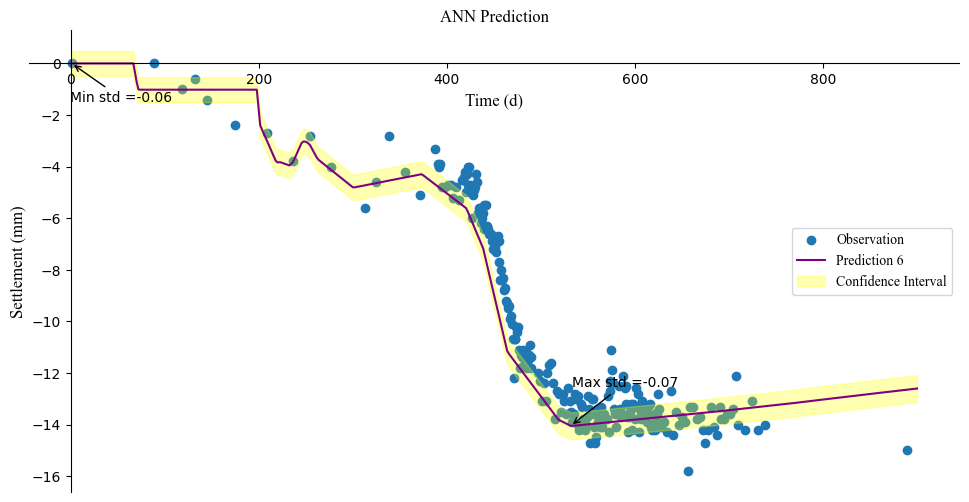

In [53]:
# #模型6(Probability neural network)######################## 
def prior6A(kernel_size,bias_size,dtype=None):  #untrainable
    n = kernel_size + bias_size 
    loc=[]
    scale=[]
    for i in range(kernel_size):
        loc.append(0.01)
        scale.append(0.05)
    for j in range(bias_size):
        loc.append(0.01)   
        scale.append(0.05)
    return tf.keras.Sequential([
                   tfp.layers.DistributionLambda(lambda t: tfd.Independent(tfd.Normal(loc=loc, scale=scale))) 
                              ])
def prior6B(kernel_size,bias_size, dtype=None): #trainable
    n = kernel_size + bias_size 
    return tf.keras.Sequential([
                   tfp.layers.VariableLayer(n, dtype=dtype),
                   tfp.layers.DistributionLambda(lambda t: tfd.Independent(tfd.Normal(loc=t, scale=1), reinterpreted_batch_ndims=1)),
                              ])

def posterior6A(kernel_size, bias_size, dtype=None):#后验为多维独立正态分布
    n = kernel_size + bias_size
    return tf.keras.Sequential([
                   tfp.layers.VariableLayer(2 * n, dtype=dtype), 
                   tfp.layers.DistributionLambda(lambda t: tfd.Independent(tfd.Normal(loc=t[..., :n], scale=1e-3 +0.001* tf.math.softplus(0.01 * t[..., n:]))))
                              ])
    
def posterior6B(kernel_size, bias_size, dtype=None):#后验为多维联合正态分布
    n = kernel_size + bias_size
    return tf.keras.Sequential([
                  tfp.layers.VariableLayer(
                  tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
                                             ),
                  tfp.layers.MultivariateNormalTriL(n),
                              ])

model6=tf.keras.Sequential([
       tf.keras.layers.Input(shape=(1,)),#输入的维度，即每个sample的feature数
       tf.keras.layers.Dense(128,activation='relu'),
       tf.keras.layers.Dense(64,activation='relu'), 
       tf.keras.layers.Dense(64,activation='relu'), 
       tf.keras.layers.Dense(32,activation='relu'), 
       tfp.layers.DenseVariational(
                              units = 6, 
                              make_prior_fn = prior6A, 
                              make_posterior_fn = posterior6A, 
                              kl_weight=1/len(x)
                             ), 
       tfp.layers.DistributionLambda(lambda t: tfd.Independent(tfd.Normal(loc=t[..., :3], scale=1e-3 + tf.math.softplus(0.01 * t[..., 3:]))))
                            ])

negloglik = lambda y, p_y: -p_y.log_prob(y)
model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=negloglik)
model6.fit(x,y,epochs=6000,verbose=0,validation_split=0.2)

# y_pred_list = []
# for i in range(6):
#    y_pred = model6.predict(px)
#    y_pred_list.append(y_pred)
#    y_preds = np.concatenate(y_pred_list, axis=1)
# py6  = np.mean(y_preds, axis=1)
# std6 =  np.std(y_preds, axis=1)
 
py6=model6(px).mean()
std6=model6(px).variance()

#py6=tf.reduce_mean(py6, axis=1, keepdims=True) 
py6=(py6[:,0]*std6[:,0]+py6[:,1]*std6[:,1]+py6[:,2]*std6[:,2])/tf.squeeze(tf.reduce_sum(std6, axis=1, keepdims=True)) 
std6=tf.squeeze(tf.reduce_sum(std6, axis=1, keepdims=True)/3) 

max6 = tf.argmax(std6)
min6 = tf.argmin(std6)


plt.figure(figsize=(12, 6))
plt.title('ANN Prediction',font='times new roman',fontsize=12)
plt.xlabel('Time (d)',font='times new roman',fontsize=12)
plt.xticks(font='times new roman',fontsize=12)
plt.ylabel('Settlement (mm)',font='times new roman',fontsize=12)
plt.yticks(font='times new roman',fontsize=12)
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["bottom"].set_position(("data", 0))
plt.gca().spines["left"].set_position(("data", 0))
plt.scatter(x,y,label='Observation')
plt.plot(px, py6, label='Prediction 6',linestyle='-', color='purple')#模型6（Gaussion）
plt.fill_between(px.ravel(),
                 np.ravel(py6)- np.ravel(std6),
                 np.ravel(py6) + np.ravel(std6),
                 color='yellow', alpha=0.3, label='Confidence Interval')
plt.annotate(f'Max std ={std6[max6]/tf.reduce_mean(py6):.2f}', xy=(px[max6], py6[max6]), xytext=(px[max6]+1.5, py6[max6]+1.5),
             arrowprops=dict(facecolor='red', arrowstyle='->'))
plt.annotate(f'Min std ={std6[min6]/tf.reduce_mean(py6):.2f}', xy=(px[min6], py6[min6]), xytext=(px[min6]-1.5, py6[min6]-1.5),
             arrowprops=dict(facecolor='blue', arrowstyle='->'))
plt.legend(loc='center right',prop='times new roman',fontsize=12)
plt.savefig('C:/Users/Tongrui/Desktop/1.jpeg')
plt.show()


In [19]:
# #模型5(非线性回归)#######################
# py5=np.polyval(np.polyfit(x.reshape(len(x),),y,4),px)
# n=float(len(x))
# MSE=np.mean(np.square(y-np.polyval(np.polyfit(x.reshape(len(x),),y,1),x)))/n
# plt.figure(figsize=(12, 6))
# plt.title('ANN Prediction',font='times new roman',fontsize=12)
# plt.xlabel('Time (d)',font='times new roman',fontsize=12)
# plt.xticks(font='times new roman',fontsize=12)
# plt.ylabel('Settlement (mm)',font='times new roman',fontsize=12)
# plt.yticks(font='times new roman',fontsize=12)
# plt.gca().spines["right"].set_color("none")
# plt.gca().spines["top"].set_color("none")
# plt.gca().spines["bottom"].set_position(("data", 0))
# plt.gca().spines["left"].set_position(("data", 0))
# plt.scatter(x,y,label='Observation')
# plt.plot(px, py5, label='Prediction 4',linestyle=':', color='k')#模型5
# plt.annotate('Max std', xy=(px[max2], py2[max2]), xytext=(px[max2]+1.5, py2[max2]+1.5),
#              arrowprops=dict(facecolor='red', arrowstyle='->'))
# plt.annotate('Min std', xy=(px[min2], py2[min2]), xytext=(px[min2]-1.5, py2[min2]-1.5),
#              arrowprops=dict(facecolor='blue', arrowstyle='->'))
# plt.legend(loc='center right',prop='times new roman',fontsize=12)
# plt.savefig('C:/Users/Tongrui/Desktop/1.jpeg')
# plt.show()

In [20]:
# #模型4(Gaussion Process by tf)#######################
#定义先验核函数
# kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(
#     amplitude=tf.Variable(3, dtype=np.float64, name='amplitude'),
#     length_scale=tf.Variable(10., dtype=np.float64, name='length_scale'))
# noise=tf.Variable(1, dtype=np.float64, name='noise')
# y=y.reshape(len(y),)

# gp4 =tfp.distributions.GaussianProcessRegressionModel(
#                                         kernel=kernel,
#                                         index_points=px,
#                                         observation_index_points=x,
#                                         observations=y,
#                                         observation_noise_variance=noise
#                                                     )
# #定义训练优化方法，训练模型
# optimizers=tf.optimizers.Adam(learning_rate=0.01)
# @tf.function
# def optimize():
#   with tf.GradientTape() as Tape:
#     loss = -gp4.log_prob(y)
#   grads = Tape.gradient(loss, gp4.trainable_variables)
#   optimizers.apply_gradients(zip(grads, gp4.trainable_variables))
#   return loss
# for i in range(100):
#   neg_log_likelihood = optimize()
#   if i % 10 == 0:
#     print("Step {}: NLL = {}".format(i, neg_log_likelihood))
# print("Final NLL = {}".format(neg_log_likelihood))

# #用训练后的模型获取后验
# PR=gp4.posterior_predictive(
#                              observations=y,
#                              predictive_index_points=px
#                             )
# py4=PR.mean()
# std4=PR.stddev()

# plt.figure(figsize=(12, 6))
# plt.title('ANN Prediction',font='times new roman',fontsize=12)
# plt.xlabel('Time (d)',font='times new roman',fontsize=12)
# plt.xticks(font='times new roman',fontsize=12)
# plt.ylabel('Settlement (mm)',font='times new roman',fontsize=12)
# plt.yticks(font='times new roman',fontsize=12)
# plt.gca().spines["right"].set_color("none")
# plt.gca().spines["top"].set_color("none")
# plt.gca().spines["bottom"].set_position(("data", 0))
# plt.gca().spines["left"].set_position(("data", 0))
# plt.scatter(x,y,label='Observation')
# plt.plot(px, py4,label='Prediction 4',linestyle='--', color='c')#模型4（Gaussion）
# plt.fill_between(px.ravel(),
#                  py4 - np.sqrt(std4),
#                  py4 + np.sqrt(std4),
#                  color='yellow', alpha=0.3, label='Confidence Interval')
# plt.annotate('Max std', xy=(px[max2], py2[max2]), xytext=(px[max2]+1.5, py2[max2]+1.5),
#              arrowprops=dict(facecolor='red', arrowstyle='->'))
# plt.annotate('Min std', xy=(px[min2], py2[min2]), xytext=(px[min2]-1.5, py2[min2]-1.5),
#              arrowprops=dict(facecolor='blue', arrowstyle='->'))
# plt.legend(loc='center right',prop='times new roman',fontsize=12)
# plt.savefig('C:/Users/Tongrui/Desktop/1.jpeg')
# plt.show()

In [ ]:
# #模型3(Gaussian by sklearn)######################## 
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
#                                               ExpSineSquared, DotProduct,
#                                               ConstantKernel) 
# import sklearn.gaussian_process.kernels as k
# dic_of_kernel={}
# dic_of_kernel[1]=RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
# dic_of_kernel[2]=RationalQuadratic(length_scale=0.1, alpha=5.)
# dic_of_kernel[3]=ExpSineSquared(length_scale=1.0, periodicity=3.0,length_scale_bounds=(0.1, 10.0),periodicity_bounds=(1.0, 10.0))
# dic_of_kernel[4]=ConstantKernel(0.1, (0.01, 10.0))*(DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2)
# dic_of_kernel[5]=Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5)
# dic_of_kernel[6]=tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1.0, length_scale=0.7)

# gp3 = GaussianProcessRegressor(kernel=dic_of_kernel[6],optimizer='adam',n_restarts_optimizer=50,normalize_y=False)
# gp3.fit(x,y)# Instantiated Gaussian regression model
# py3,std5 = gp3.predict(px, return_std=True)
# 绘制
# plt.figure(figsize=(12, 6))
# plt.title('ANN Prediction',font='times new roman',fontsize=12)
# plt.xlabel('Time (d)',font='times new roman',fontsize=12)
# plt.xticks(font='times new roman',fontsize=12)
# plt.ylabel('Settlement (mm)',font='times new roman',fontsize=12)
# plt.yticks(font='times new roman',fontsize=12)
# plt.gca().spines["right"].set_color("none")
# plt.gca().spines["top"].set_color("none")
# plt.gca().spines["bottom"].set_position(("data", 0))
# plt.gca().spines["left"].set_position(("data", 0))
# plt.scatter(x,y,label='Observation')
# plt.plot(px, py3, label='Prediction 3',linestyle='--', color='brown')#模型3（Gaussion）
# plt.fill_between(px.ravel(),
#                  py3 - 5 * np.sqrt(std3),
#                  py3 + 5 * np.sqrt(std3),
#                  color='blue', alpha=0.3, label='Confidence Interval')
# plt.legend(loc='center right',prop='times new roman',fontsize=12)
# plt.savefig('C:/Users/Tongrui/Desktop/1.jpeg')
# plt.show()


In [21]:
# #模型2#######################
# negloglik = lambda y, p_y: -p_y.log_prob(y)
# model2 = tf.keras.Sequential([tf.keras.layers.Input(shape=(1,)),
#                              tf.keras.layers.Dense(128,activation='tanh'),
#                              tf.keras.layers.Dense(64,activation='tanh'),
#                              tf.keras.layers.Dense(64,activation='relu'),
#                              tf.keras.layers.Dense(64,activation='tanh'),
#                              tf.keras.layers.Dense(2),
#                              tfp.layers.DistributionLambda(
#                                  lambda t: tfd.Normal(loc=t[..., :1],scale=t[..., 1:]))
#                              ])
# model2.compile(optimizer='adam',loss=negloglik)
# model2.fit(x,y,epochs=100,verbose=0)
# loss2 = model2.evaluate(x, y)
# py2=model2(px).mean().numpy().flatten()
# std2=model2(px).stddev().numpy().flatten()
# max2 = np.argmax(std2)
# min2 = np.argmin(std2)
# 绘制
# plt.figure(figsize=(12, 6))
# plt.title('ANN Prediction',font='times new roman',fontsize=12)
# plt.xlabel('Time (d)',font='times new roman',fontsize=12)
# plt.xticks(font='times new roman',fontsize=12)
# plt.ylabel('Settlement (mm)',font='times new roman',fontsize=12)
# plt.yticks(font='times new roman',fontsize=12)
# plt.gca().spines["right"].set_color("none")
# plt.gca().spines["top"].set_color("none")
# plt.gca().spines["bottom"].set_position(("data", 0))
# plt.gca().spines["left"].set_position(("data", 0))
# plt.scatter(x,y,label='Observation')
# plt.plot(px, py2, label='Prediction 2',linestyle='-.', color='r')#模型2
# plt.fill_between(px.ravel(),
#                  py2 - std2,
#                  py2 + std2,
#                  color='yellow', alpha=0.3, label='Confidence Interval')
# plt.annotate('Max std', xy=(px[max2], py2[max2]), xytext=(px[max2]+1.5, py2[max2]+1.5),
#              arrowprops=dict(facecolor='red', arrowstyle='->'))
# plt.annotate('Min std', xy=(px[min2], py2[min2]), xytext=(px[min2]-1.5, py2[min2]-1.5),
#              arrowprops=dict(facecolor='blue', arrowstyle='->'))
# plt.legend(loc='center right',prop='times new roman',fontsize=12)
# plt.savefig('C:/Users/Tongrui/Desktop/1.jpeg')
# plt.show()


In [22]:
# #模型1#######################
# model1 = tf.keras.Sequential([tf.keras.layers.Input(shape=(1,)),
#                              tf.keras.layers.Dense(128,activation='sigmoid'),
#                              tf.keras.layers.Dense(64,activation='tanh'),
#                              tf.keras.layers.Dense(64,activation='relu'),
#                              tf.keras.layers.Dense(64,activation='tanh'),
#                              tf.keras.layers.Dense(1)])
# model1.compile(optimizer='adam',loss='mse')
# model1.fit(x,y,epochs=100,verbose=0)
# loss1 = model1.evaluate(x, y)
# py1=model1.predict(px)
# 绘制
# plt.figure(figsize=(12, 6))
# plt.title('ANN Prediction',font='times new roman',fontsize=12)
# plt.xlabel('Time (d)',font='times new roman',fontsize=12)
# plt.xticks(font='times new roman',fontsize=12)
# plt.ylabel('Settlement (mm)',font='times new roman',fontsize=12)
# plt.yticks(font='times new roman',fontsize=12)
# plt.gca().spines["right"].set_color("none")
# plt.gca().spines["top"].set_color("none")
# plt.gca().spines["bottom"].set_position(("data", 0))
# plt.gca().spines["left"].set_position(("data", 0))
# plt.scatter(x,y,label='Observation')
# plt.plot(px, py1, label='Prediction 1',linestyle='-', color='r')#模型1
# plt.legend(loc='center right',prop='times new roman',fontsize=12)
# plt.savefig('C:/Users/Tongrui/Desktop/1.jpeg')
# plt.show()
